In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('/data/tejess/hypothesis_generation/past-interaction-learning/code/experiments')
from hypotheses_generation import SummaryInformation

In [2]:
import pickle
d = {}
for i in range(5, 101, 5):
    path ='/data/rosa-shared/chatgpt-shoe-100-hypothesis/turbo35_0613_train100_inheritnothing_no_demonstration_seed49_k4_step'+str(i)+'.pkl'
    with open(path, "rb") as f:
        hypothesis = pickle.load(f)
    sorted_hypothesis = sorted(hypothesis.items(), key=lambda x: x[1].reward, reverse=True)
    for j, tup in enumerate(sorted_hypothesis):
        if tup[0] == "num_example_summaries" or j >= 10:
            continue
        if tup[0] not in d:
            d[tup[0]] = []

        d[tup[0]].append((i, tup[1].reward))
    
for key in d.keys():
    print(key, d[key])

The customer's appearance: a young and short man with black hat, orange shirt, and a large green bag. The customer bought a pair of orange shoes.
 [(5, 1.032890404341022), (10, 1.0182457532861684), (15, 0.8435904182966685), (20, 0.7393043238302924), (25, 0.7195643457068401), (30, 0.6423804394570873), (35, 0.6578287559332743), (40, 0.641996818430749), (45, 0.6412015894427494), (50, 0.6266981133106047), (55, 0.6287826053962694), (60, 0.630664056161002), (65, 0.6323772458091592), (70, 0.6473336329804622), (75, 0.6487629701162676), (80, 0.6500897229717534), (85, 0.6638524996400044), (90, 0.664994785616579), (95, 0.6660686371529494), (100, 0.6670815174764146)]
The customer's appearance: a young and tall man with green hat, red shirt, and a small red bag. The customer bought a pair of red shoes.
 [(5, 0.8836756873997224), (10, 0.739926295609404), (15, 0.679114707416329), (20, 0.6722226952469967), (25, 0.6505890022180989), (30, 0.6056868659317375), (35, 0.6100926068870351), (40, 0.61383241613

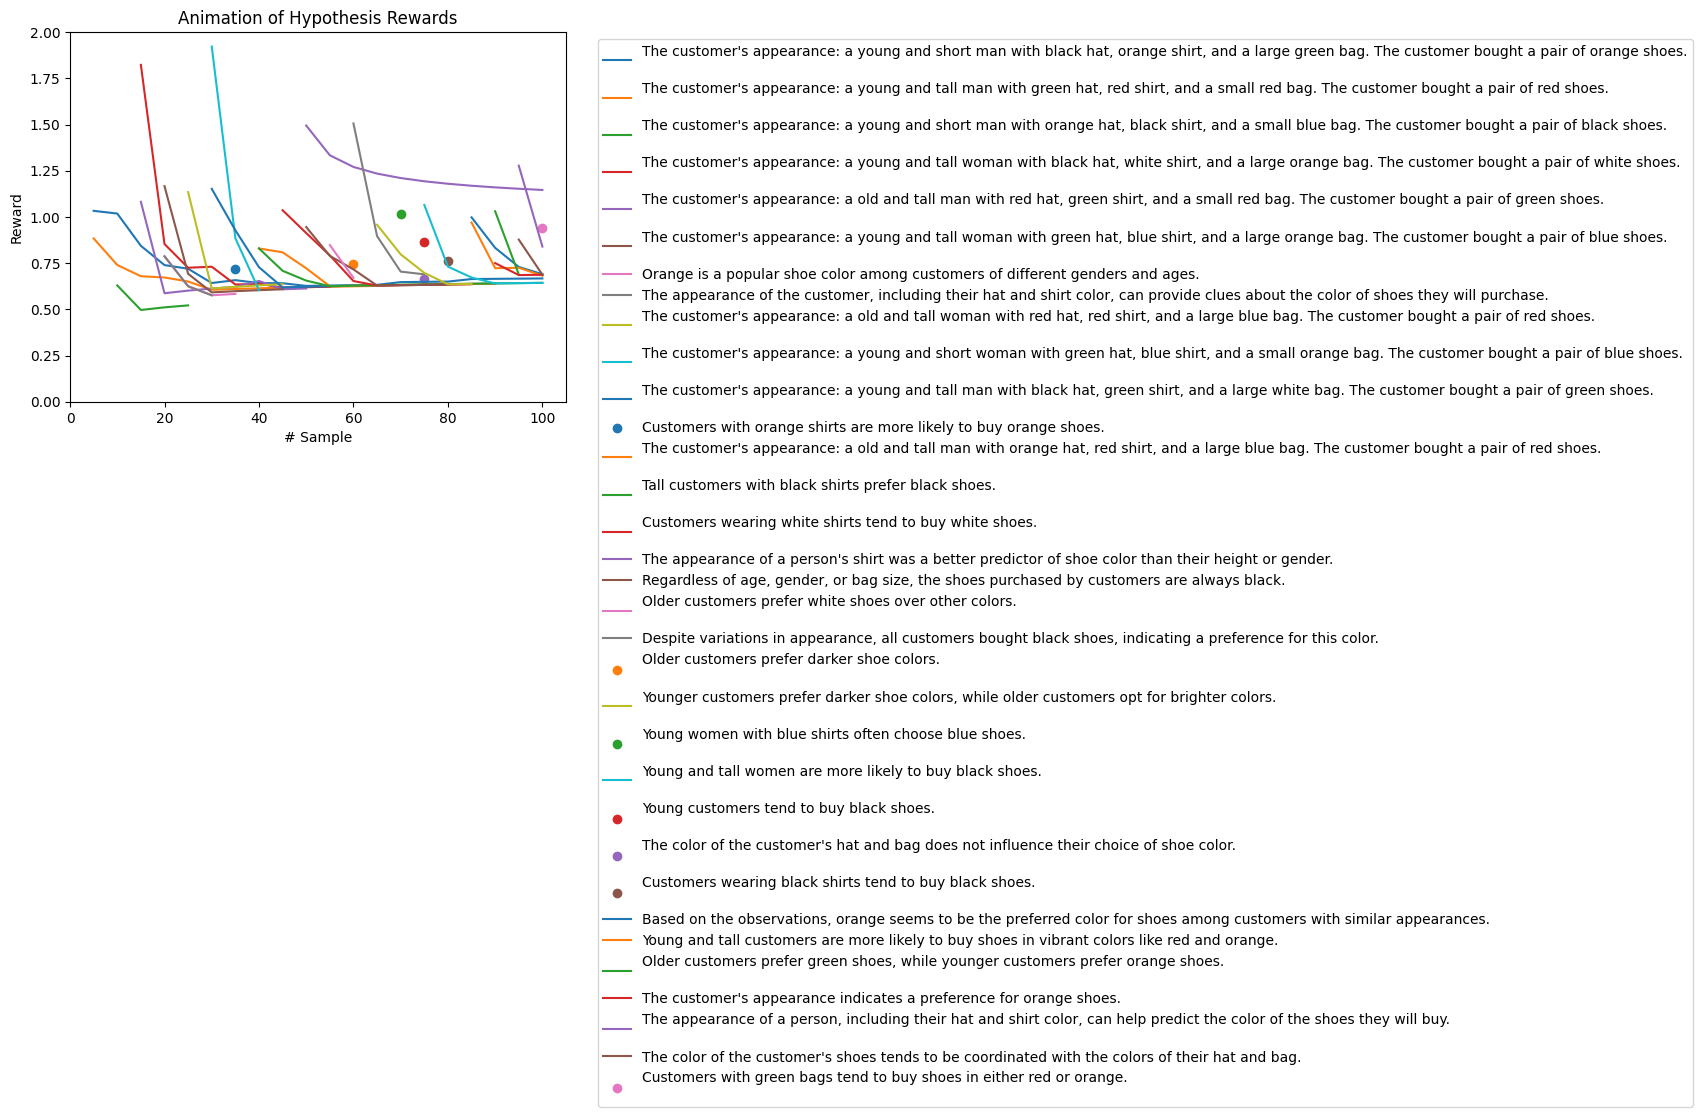

In [8]:
fig = plt.figure()
def animate(frame):
    plt.clf()  
    plt.axis([0, 105, 0, 2])
    for hypothesis, points in d.items():
        x, y = zip(*points)
        if x[0] <= frame:
            elem = (frame-x[0])//5
            if len(x[:frame]) == 1:
                plt.scatter(x[:elem+1], y[:elem+1], label=hypothesis)
            else:
                plt.plot(x[:elem+1], y[:elem+1], label=hypothesis)

    plt.xlabel("# Sample")
    plt.ylabel("Reward")
    plt.title("Animation of Hypothesis Rewards")
    lgd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    pth = '/data/tejess/hypothesis_generation/past-interaction-learning/visualization_graphics/'
    fig.savefig(pth+str(frame)+'.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=500)
    return fig

for i in range(5, 101, 5):
    animate(i)

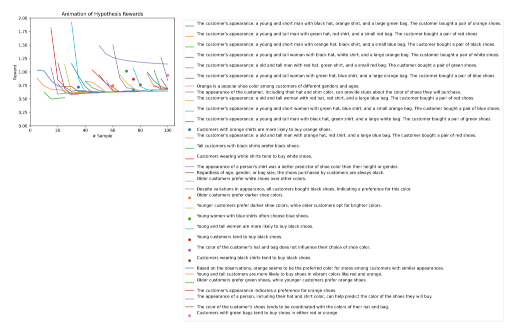

In [9]:
import matplotlib.animation as animation

fig = plt.figure()

def update_frame(frame):
    plt.clf()
    plt.imshow(frames[frame])
    plt.axis("off")

pth = '/data/tejess/hypothesis_generation/past-interaction-learning/visualization_graphics/'

frames = [plt.imread(filename, format='png') for filename in [pth+str(i)+'.png' for i in range(5, 101, 5)]]
anim = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=1500)


anim.save(pth+"animation.gif", writer="imagemagick")

# Optionally, show the final frame
plt.show()